<a href="https://colab.research.google.com/github/20B01A0570/Kannikanti-Gayathri-Machine-Learning-Intern-YBI/blob/main/Fake_News_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YBI FOUNDATION 'MACHINE LEARNING INTERN'
**Author:** Kannikanti Gayathri<br>
**Batch:** 1st August<br>
**Project 8:** Fake News Detection using Machine Learning<br>
**Dataset Links:** <br>
**True News:** https://www.dropbox.com/s/l6gojm6mn9rosdo/True%20News.csv?dl=1<br>
**Fake News:**https://www.dropbox.com/s/tlinvf90go2xngy/Fake%20News.csv?dl=1


#Importing Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

#Importing Data from Data Sets

In [27]:
fake = pd.read_csv('https://www.dropbox.com/s/l6gojm6mn9rosdo/True%20News.csv?dl=1')
true = pd.read_csv('https://www.dropbox.com/s/tlinvf90go2xngy/Fake%20News.csv?dl=1')

In [28]:
fake

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [29]:
true

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [30]:
fake.shape

(21417, 4)

In [31]:
true.shape

(23481, 4)

In [32]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [33]:
true.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [34]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [38]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [39]:
fake['target'] = 'fake'
true['target'] = 'true'

In [40]:
data=true.append(fake).sample(frac=1).reset_index().drop(columns=['index'])

In [41]:
data

,title,text,subject,date,target
0,CHER HUMILIATES Democrats Over Childish Neil G...,"DEMS,The Merrick Garland SHIP HAS SAILED Let ...",left-news,"Apr 4, 2017",true
1,WATCH: Elizabeth Warren Skewers Donald Trump ...,Senator Elizabeth Warren continued her crusade...,News,"June 27, 2016",true
2,ELECTIONS HAVE CONSEQUENCES: MUSLIM MAYOR Make...,Nothing says respect for America and for your ...,left-news,"Feb 6, 2017",true
3,SUPER SATURDAY SHOCKER: Cruz Crushing Trump In...,Maybe its Trump s announcement that he s softe...,politics,"Mar 5, 2016",true
4,NEW YORK MAN SHOCKED To Discover Who Was Steal...,A New York man was stunned this week to find o...,left-news,"Sep 28, 2016",true
...,...,...,...,...,...
44893,"JOKE OF THE WEEK: A Marine, A Priest And A Fla...",HYSTERICAL!A US Marine enters the Catholic Chu...,left-news,"Mar 5, 2016",true
44894,DEMOCRAT SENATOR AL FRANKEN Thought It Would B...,Democratic Senator Al Franken who has been a...,left-news,"Nov 16, 2017",true
44895,OOPS! MIT Researchers Debunk Global Warming Da...,B b..but Al Gore and Barack Obama say Scientis...,left-news,"Jul 16, 2017",true
44896,TAKE OUR POLL: Who Do You Think President Trum...,,left-news,"May 10, 2017",true


In [42]:
data.shape

(44898, 5)

In [43]:
data.columns

Index(['title', 'text', 'subject', 'date', 'target'], dtype='object')

In [44]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

([<matplotlib.patches.Wedge at 0x7fdfd40a3110>,
 [Text(-1.1968727148445069, 0.08657773651892332, 'fake'),
  Text(1.1968727229504943, -0.08657762445961172, 'true')],
 [Text(-0.6981757503259622, 0.050503679636038606, '47.7%'),
  Text(0.698175755054455, -0.05050361426810683, '52.3%')])

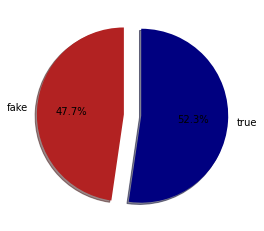

In [45]:
cat_tar=pd.get_dummies(data.target)['fake']
label_size = [cat_tar.sum(),len(cat_tar)-cat_tar.sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['fake','true'],autopct='%1.1f%%')

In [46]:
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import LabelEncoder

In [47]:
data.title

0        CHER HUMILIATES Democrats Over Childish Neil G...
1         WATCH: Elizabeth Warren Skewers Donald Trump ...
2        ELECTIONS HAVE CONSEQUENCES: MUSLIM MAYOR Make...
3        SUPER SATURDAY SHOCKER: Cruz Crushing Trump In...
4        NEW YORK MAN SHOCKED To Discover Who Was Steal...
                               ...                        
44893    JOKE OF THE WEEK: A Marine, A Priest And A Fla...
44894    DEMOCRAT SENATOR AL FRANKEN Thought It Would B...
44895    OOPS! MIT Researchers Debunk Global Warming Da...
44896    TAKE OUR POLL: Who Do You Think President Trum...
44897    Trudeau sees no flood of Americans to Canada i...
Name: title, Length: 44898, dtype: object

In [48]:
data.target

0        true
1        true
2        true
3        true
4        true
         ... 
44893    true
44894    true
44895    true
44896    true
44897    fake
Name: target, Length: 44898, dtype: object

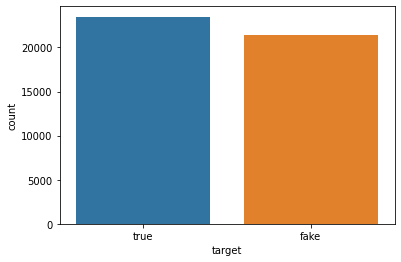

In [49]:
sns.countplot(data=data,x='target')

#Spliting the data into training and testing

In [50]:
#Split the dataset
labels = data.target
x_train,x_test,y_train,y_test=train_test_split(data['text'], labels, test_size=0.3, random_state=14278)

In [51]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((31428,), (13470,), (31428,), (13470,))

#Evaluation

In [52]:
#Fake News Detection  - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#Fake News Detection  - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

#1.Logistic Regression

In [53]:
#Fake News Detection - Initialize a Logistic Regression
LR= LogisticRegression(max_iter=1000)
LR.fit(tfidf_train,y_train)
#Fake News Detection - Predict on the test set and calculate accuracy
y_pred=LR.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 98.57%


#Plotting confusion matrix for Logistic Regression

              precision    recall  f1-score   support

        fake       0.99      0.98      0.98      6393
        true       0.98      0.99      0.99      7077

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


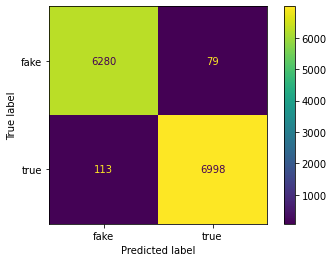

In [54]:
print(classification_report(y_pred,y_test))
plot_confusion_matrix(LR,tfidf_test,y_test)

#2. Linear SVC

In [55]:
#Fake News Detection - Initialize a Linear SVC
L_SVC= LinearSVC()
L_SVC.fit(tfidf_train,y_train)
#Fake News Detection - Predict on the test set and calculate accuracy
y_pred=L_SVC.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.41%


#Plotting confusion matrix for Linear SVC

              precision    recall  f1-score   support

        fake       1.00      0.99      0.99      6378
        true       0.99      1.00      0.99      7092

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


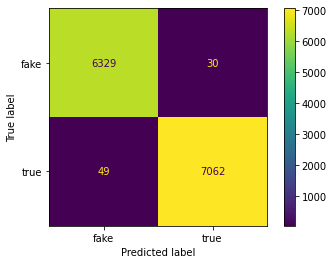

In [56]:
print(classification_report(y_pred,y_test))
plot_confusion_matrix(L_SVC,tfidf_test,y_test)